In [1]:
from trout.intra.year import Year
from trout.intra.night import Night

import numpy as np
import pandas as pd

In [2]:
a = Year(2009)

In [3]:
# choose a night a random
import random
night = random.choice(a.nights)

In [4]:
night

May 02, 2009

In [5]:
# We are going to use this night from now on

In [6]:
# Note that this is a Night instance not a date instance,
# althought you could do things like get date instance from 
# the night

print(type(night))
print(night.night_date)

<class 'trout.intra.night.Night'>
2009-05-02


In [7]:
# There are quite a few details of the data processing that we
# see for this night

In [8]:
# 1. Alignment statitstics for the images

In [9]:
night.alignment_stats

,Image_Name,Rotation,Translation_X,Translation_Y,Scale
0,m23_3.5-001.fit,0.054193,158.705,38.772,0.882
1,m23_3.5-002.fit,0.054162,159.499,38.899,0.882
2,m23_3.5-003.fit,0.054417,158.944,38.166,0.882
3,m23_3.5-004.fit,0.054001,160.012,37.946,0.882
4,m23_3.5-005.fit,0.053648,161.949,36.528,0.882
...,...,...,...,...,...
1635,m23_3.5-1636.fit,0.055736,159.914,292.017,0.881
1636,m23_3.5-1637.fit,0.055686,161.576,290.495,0.881
1637,m23_3.5-1638.fit,0.055789,163.423,288.952,0.881
1638,m23_3.5-1639.fit,0.055920,163.710,288.496,0.881


In [10]:
# If we want access to aligned combined images data
# we can do that too

In [11]:
# We choose a alignmened combined image at random
ac = random.choice(night.aligned_combined)

In [12]:
# Let's peek at the center of the data, and find it's 
# min, max, median, mean, std, etc.
print(ac.data[400:600, 400:600])
print(np.mean(ac.data))
print(np.median(ac.data))
print(np.std(ac.data))

[[4406 4469 4311 ... 4391 4341 4346]
 [4474 4439 4507 ... 4337 4451 4385]
 [4751 4767 4749 ... 4417 4401 4382]
 ...
 [4422 4375 4293 ... 4388 4254 4461]
 [4530 4332 4414 ... 4335 4407 4418]
 [4345 4339 4322 ... 4310 4279 4338]]
3365.319670677185
4338.0
2614.7676184042166


In [13]:
# Lets take a look at logfile combined file
# We'll choose the 5th file this time.
lg = night.logfile_combined[4]
print(lg)

Night: May 02, 2009. 05-02-09_m23_3.5-005.txt


In [14]:
lg.data

,X,Y,XFWHM,YFWHM,Avg FWHM,Sky ADU,Star ADU 3,Star ADU 4,Star ADU 5
Star_no,,,,,,,,,
1,746.38,459.20,4.3206,4.0809,4.2008,5696.11,3873978.24,4750804.68,5303331.69
2,547.12,493.65,3.7828,3.7541,3.7685,5686.81,1938165.89,2247170.24,2411697.72
3,462.53,522.73,3.7057,3.8344,3.7700,5672.33,1896744.55,2217630.50,2376208.60
4,230.29,347.36,3.4322,3.7540,3.5931,5638.31,1707596.18,1929263.14,2045201.71
5,112.45,420.52,0.0000,0.0000,0.0000,1401.42,-40641.07,-68669.40,-113514.72
...,...,...,...,...,...,...,...,...,...
2506,360.44,979.29,0.0000,0.0000,0.0000,5551.77,3012.58,3826.96,3283.38
2507,515.39,980.95,5.0498,0.0000,2.5249,5556.70,1483.34,2416.63,3105.59
2508,39.31,732.44,0.0000,0.0000,0.0000,0.00,0.00,0.00,0.00


In [15]:
# Let's get all FWHM for the stars and find average for the night
fwhm_x = {star: [] for star in range(1, 2511)} # Make empty containers
fwhm_y = {star: [] for star in range(1, 2511)} 
for file in night.logfile_combined:
    data = file.data
    for star_no in range(1, 2510): 
        xfwhm = data.loc[star_no, "XFWHM"]
        yfwhm = data.loc[star_no, "XFWHM"]
        if xfwhm > 0:
            fwhm_x[star_no].append(xfwhm)
        if yfwhm > 0:
            fwhm_y[star_no].append(yfwhm)

In [16]:
fwhm_x_avg = {star : np.median(fwhm_x[star]) for star in fwhm_x}
fwhm_y_avg = {star : np.median(fwhm_y[star]) for star in fwhm_y}

/opt/tljh/user/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/tljh/user/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
# We could then compare these FWHM to another night, or another year

In [18]:
# For eclipsing binary stars, you might want to look at the flux logs 
# combined. You can do that too from here

In [19]:
# 16 is an EB
s16 = night.get_star_fluxlog_for_radius(star_no=16, radius=4)

In [20]:
s16.data.head()

,ADU,X,Y,Norm,Datetime
0,1429513.51,700.84,685.79,1.04213,2009-05-03T08:10:33
1,1447745.86,700.83,685.74,1.01430,2009-05-03T08:13:24
2,1442852.11,700.84,685.75,1.00714,2009-05-03T08:16:15
3,1448239.38,700.83,685.77,1.00321,2009-05-03T08:19:07
4,1450748.39,700.84,685.77,0.98274,2009-05-03T08:21:58


In [21]:
s16.data.Datetime = pd.to_datetime(s16.data['Datetime'], format='%Y-%m-%dT%H:%M:%S')

In [22]:
s16.data.head()

,ADU,X,Y,Norm,Datetime
0,1429513.51,700.84,685.79,1.04213,2009-05-03 08:10:33
1,1447745.86,700.83,685.74,1.01430,2009-05-03 08:13:24
2,1442852.11,700.84,685.75,1.00714,2009-05-03 08:16:15
3,1448239.38,700.83,685.77,1.00321,2009-05-03 08:19:07
4,1450748.39,700.84,685.77,0.98274,2009-05-03 08:21:58


<Axes: xlabel='Datetime'>

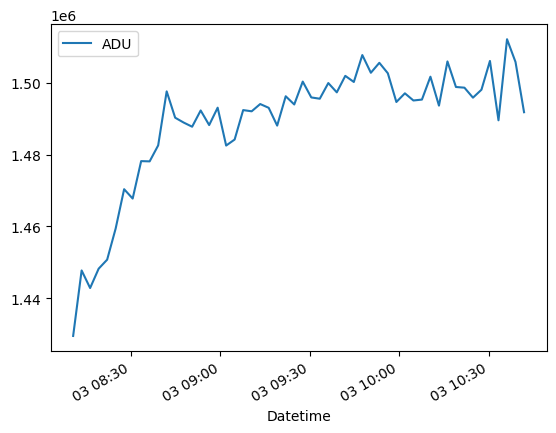

In [23]:
s16.data.plot(y="ADU", x="Datetime")

In [24]:
# You also have access to the color normalized file data from the night

In [25]:
cn = night.get_color_normalized(radius=5)

In [26]:
cn

,Normalized Median Flux,Norm Factor,Measured Mean R-I,Used Mean R-I
Star #,,,,
1,1.645259e+06,0.210476,0.35642,0.35642
2,7.471364e+05,0.219964,0.65556,0.65556
3,7.506702e+05,0.222740,0.75832,0.75832
4,6.409032e+05,0.222090,0.73520,0.73520
5,0.000000e+00,0.220465,0.67493,0.67493
...,...,...,...,...
2506,0.000000e+00,0.233308,100.00000,100.00000
2507,0.000000e+00,0.233308,100.00000,100.00000
2508,0.000000e+00,0.233308,100.00000,100.00000


In [30]:
# Here's the data for star 120
cn.loc[120]

Normalized Median Flux    47131.110806
Norm Factor                   0.210648
Measured Mean R-I             0.368270
Used Mean R-I                 0.368270
Name: 120, dtype: float64

In [27]:
# Here's the sky background data for the night
# This has a lot of columns (use only what you need)
night.sky_bg

,Date,Image_number,First_img,Last_img,Moon_Phase,Moon_Phase_Name,Normalized_cluster_angle,Cluster_Angle_Round,Cluster_Angle,Cluster_Angle_Uncertainty,...,15_6,15_7,15_8,15_9,15_10,15_11,15_12,15_13,15_14,15_15
0,2009-05-03T08:10:33,22,22,75,0.29549,First_Quarter,27,26,25.7,0.5,...,3747.79,3737.50,3746.52,3753.24,3751.19,3756.12,3773.66,3760.15,3779.08,3761.56
1,2009-05-03T08:13:24,23,22,75,0.29556,First_Quarter,27,26,25.8,0.5,...,3668.22,3660.05,3667.88,3674.74,3674.81,3680.39,3701.18,3691.03,3709.66,3688.33
2,2009-05-03T08:16:15,24,22,75,0.29563,First_Quarter,27,26,26.0,0.5,...,3578.30,3564.38,3575.09,3578.76,3578.57,3582.07,3602.36,3592.30,3612.42,3590.46
3,2009-05-03T08:19:07,25,22,75,0.29569,First_Quarter,27,26,26.1,0.4,...,3498.86,3482.53,3492.77,3494.67,3495.07,3498.03,3518.27,3502.75,3521.42,3506.66
4,2009-05-03T08:21:58,26,22,75,0.29576,First_Quarter,27,26,26.3,0.4,...,3413.79,3397.82,3406.32,3415.78,3411.93,3417.88,3430.93,3420.11,3438.50,3420.35
5,2009-05-03T08:24:49,27,22,75,0.29583,First_Quarter,27,26,26.4,0.4,...,3326.56,3312.95,3320.76,3328.43,3325.76,3329.28,3348.55,3338.08,3351.19,3330.27
6,2009-05-03T08:27:40,28,22,75,0.29589,First_Quarter,27,27,26.5,0.4,...,3262.72,3249.20,3255.04,3262.17,3257.80,3261.33,3280.71,3266.55,3285.05,3265.35
7,2009-05-03T08:30:32,29,22,75,0.29596,First_Quarter,27,27,26.6,0.4,...,3217.17,3208.43,3213.90,3217.30,3212.89,3217.31,3235.71,3220.50,3238.59,3218.28
8,2009-05-03T08:33:23,30,22,75,0.29603,First_Quarter,27,27,26.8,0.3,...,3143.01,3129.49,3138.73,3142.23,3138.46,3142.00,3159.81,3146.64,3162.76,3144.81
9,2009-05-03T08:36:14,31,22,75,0.29610,First_Quarter,27,27,26.9,0.3,...,3110.72,3094.77,3101.80,3107.87,3105.33,3106.53,3125.96,3110.05,3128.78,3107.67
